In [1]:
import numpy as np

In [5]:
# matrix inversion
A = np.array([[2,1],[1,3]])
B = np.array([4,7])
X = np.linalg.inv(A).dot(B)
print('Solution')
print(X)

Solution
[1. 2.]


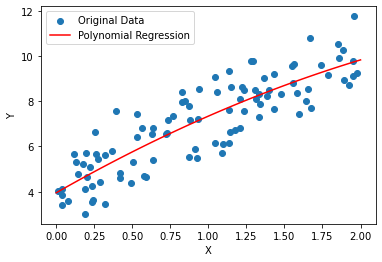

Coefficients:
[[ 0.          3.84100842 -0.45190593]]
Intercept:
[3.95139826]


In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100,1)
Y = 4 + 3*X + np.random.randn(100,1)

# fit a polynomial regression model
degree = 2 # can be changed as needed
poly_features = PolynomialFeatures(degree = degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly , Y)

# make prediction
X_new = np.linspace(0,2,100).reshape(-1,1)
X_new_poly = poly_features.transform(X_new)
Y_new = model.predict(X_new_poly)

# Plot the original data and the polynomial regression curve
plt.scatter(X, Y, label='Original Data')
plt.plot(X_new, Y_new, 'r-', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# The coefficients of the multivariate polynomial regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)

Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



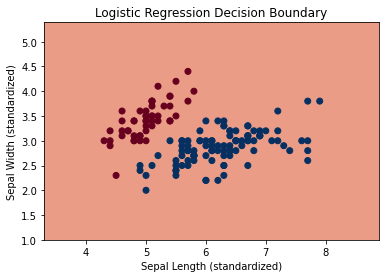

In [13]:
# example of logistic regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1 # Convert target labels to binary 0 or 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Lab Questions

1. Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable
(Y). You want to fit a polynomial regression model to this data. Implement the process of selecting the
appropriate degree for the polynomial (e.g., linear, quadratic, cubic) based on the dataset using Python.

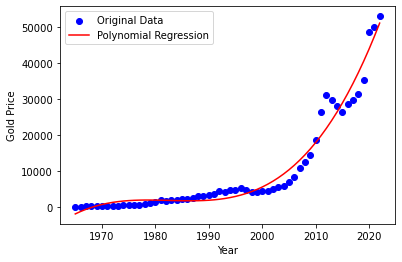

Coefficients:
[ 0.00000000e+00  9.74149598e+06 -4.91370043e+03  8.26168569e-01]
Intercept:
-6437533278.116175


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


gold = pd.read_csv("gold.csv")
x= gold.iloc[:, 0:1].values  
y= gold.iloc[:, 1].values  
model = LinearRegression()  
model.fit(x,y)  
degree = 3 # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)
model.fit(x_poly, y)# Make predictions

plt.scatter(x, y, label='Original Data',color='blue')
plt.plot(x,model.predict(x_poly), label='Polynomial Regression',color='red')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

# coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)


2. Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable
(Y). You want to fit a logistic regression model to this data. Develop an example code snippet in Python.

1.0
1.0



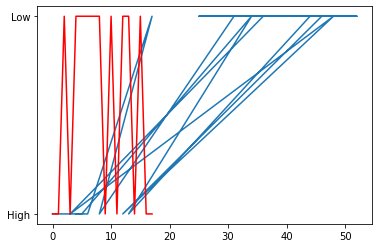

In [24]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

gold = pd.read_csv("gold.csv")
gold["Range"] = gold["Price"] > 10000
# change the value of True and false to High and low
gold["Range"] = gold["Range"].map({True: "High",False: "Low"})
x = gold.iloc[:,:1]
y = gold.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
plt.plot(y_test)
plt.plot(y_pred,color = 'red')
print(accuracy_score(y_test, y_pred))
print(model.score(X_test,y_test))
print()

3. Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a
dependent variable (Y). Implement in python, how you can perform multivariate polynomial regression to
model the relationship between the independent variables and the dependent variable.

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

gs = pd.read_csv('gold_silver.csv')
x = gs.iloc[:,:-1]
y = gs.iloc[:,-1]
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(X_poly, y)
# The coefficients of the multivariate polynomial regression model
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients: ',coefficients)
print('Intercept: ',intercept)
print('MSE: ',mean_squared_error(y,predict))

Coefficients:  [ 0.00000000e+00  1.04113939e+02 -1.28159900e+04 -3.15986752e+01
  1.29610354e+01 -4.10329546e-03  1.05822530e-02 -3.27624700e-03
  2.09969031e-06 -1.21532651e-09]
Intercept:  41529557.599422954
MSE:  4173782.1526020737


4. Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a
dependent variable (Y). Implement in python, how you can perform the logistic regression to model the
relationship between the independent variables and the dependent variable

Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]

Classification Report:
              precision    recall  f1-score   support

        2715       0.00      0.00      0.00       0.0
        3105       0.00      0.00      0.00       1.0
        3955       0.00      0.00      0.00       1.0
        5489       0.00      0.00     

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


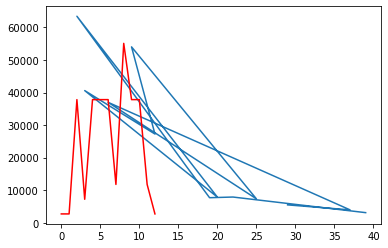

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

gs = pd.read_csv("gold_silver.csv")
x = gs.iloc[:,:-1]
y = gs.iloc[:,-1:]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Evaluate the model
plt.plot(y_test)
plt.plot(y_pred,color = 'red')
print(accuracy_score(y_test, y_pred))